### SK Electronic Shop Performance Analysis

### Problem Statemet 
SK Electronics, a local shop, wants to understand its sales patterns, customer behavior, and product performance.
The shop faces challenges in finding which products bring the most revenue, how seasonal changes affect sales, and what factors influence customer satisfaction
A clear analysis is required to make better business decisions, increase sales, and provide improved service to customers.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
sk_elec =pd.read_excel(r'C:\Users\ashuv\OneDrive\Documents\python project\electronic_shop_sales.xlsx')

In [4]:
sk_elec.head()

,Invoice_ID,Date,Product,Category,Brand,Quantity,Unit_Price,Total_Amount,Payment_Method,Customer_Age,...,Customer_City,Region,Country,Channel,Discount (%),Final_Amount,Warranty_Period,Delivery_Status,Product_Manufacture_Date,Customer_Satisfaction_Rating
0,INV1000,2022-07-02,Speaker,Accessories,Boat,5,15181,75905,Card,27,...,Wardha,Semi-Urban,India,Online,4.0,72868.80,1 year,Delivered,2020-03-14,4.0
1,INV1001,2022-10-16,Headphones,Accessories,JBL,4,1175,4700,Card,63,...,Chandrapur,Rural,India,Store,19.0,3807.00,No warranty,Delivered,2020-09-13,1.0
2,INV1002,2023-02-02,Tablet,Computers,Microsoft,2,30989,61978,EMI,30,...,Wardha,Semi-Urban,India,Store,13.0,53920.86,No warranty,Delivered,2018-06-08,3.0
3,INV1003,2022-02-01,Speaker,Accessories,JBL,3,19582,58746,UPI,48,...,Chandrapur,NaN,India,Online,27.0,42884.58,6 months,Delivered,2018-11-11,4.0
4,INV1004,2023-03-24,TV,Appliances,Sony,3,50235,150705,UPI,47,...,Wardha,Rural,India,Online,NaN,150705.00,No warranty,Delivered,2019-06-10,2.0


In [5]:
sk_elec.columns

Index(['Invoice_ID', 'Date', 'Product', 'Category', 'Brand', 'Quantity',
       'Unit_Price', 'Total_Amount', 'Payment_Method', 'Customer_Age',
       'Customer_Gender', 'Customer_City', 'Region', 'Country', 'Channel',
       'Discount (%)', 'Final_Amount', 'Warranty_Period', 'Delivery_Status',
       'Product_Manufacture_Date', 'Customer_Satisfaction_Rating'],
      dtype='object')

# Data Cleaning

In [6]:
sk_elec['Year']=sk_elec['Date'].dt.year

In [7]:
sk_elec['Month']=sk_elec['Date'].dt.month

# check null value

In [8]:
 sk_elec.isnull().sum()

Invoice_ID                        0
Date                              0
Product                           0
Category                          0
Brand                             0
Quantity                          0
Unit_Price                        0
Total_Amount                      0
Payment_Method                    0
Customer_Age                      0
Customer_Gender                   0
Customer_City                     0
Region                          316
Country                           0
Channel                           0
Discount (%)                    310
Final_Amount                      0
Warranty_Period                   0
Delivery_Status                   0
Product_Manufacture_Date          0
Customer_Satisfaction_Rating    330
Year                              0
Month                             0
dtype: int64

In [9]:
sk_elec.fillna({'Customer_Satisfaction_Rating': sk_elec.Customer_Satisfaction_Rating.median()}, inplace=True)


In [10]:
sk_elec.fillna({'Discount (%)': 'No Discount'}, inplace=True)


In [11]:
sk_elec['Region']

0       Semi-Urban
1            Rural
2       Semi-Urban
3              NaN
4            Rural
           ...    
1545           NaN
1546           NaN
1547         Urban
1548         Urban
1549    Semi-Urban
Name: Region, Length: 1550, dtype: object

In [12]:
sk_elec.fillna({'Region':'None'}, inplace=True)

In [13]:
sk_elec.isnull().sum()

Invoice_ID                      0
Date                            0
Product                         0
Category                        0
Brand                           0
Quantity                        0
Unit_Price                      0
Total_Amount                    0
Payment_Method                  0
Customer_Age                    0
Customer_Gender                 0
Customer_City                   0
Region                          0
Country                         0
Channel                         0
Discount (%)                    0
Final_Amount                    0
Warranty_Period                 0
Delivery_Status                 0
Product_Manufacture_Date        0
Customer_Satisfaction_Rating    0
Year                            0
Month                           0
dtype: int64

In [14]:
sk_elec.head()

,Invoice_ID,Date,Product,Category,Brand,Quantity,Unit_Price,Total_Amount,Payment_Method,Customer_Age,...,Country,Channel,Discount (%),Final_Amount,Warranty_Period,Delivery_Status,Product_Manufacture_Date,Customer_Satisfaction_Rating,Year,Month
0,INV1000,2022-07-02,Speaker,Accessories,Boat,5,15181,75905,Card,27,...,India,Online,4.0,72868.80,1 year,Delivered,2020-03-14,4.0,2022,7
1,INV1001,2022-10-16,Headphones,Accessories,JBL,4,1175,4700,Card,63,...,India,Store,19.0,3807.00,No warranty,Delivered,2020-09-13,1.0,2022,10
2,INV1002,2023-02-02,Tablet,Computers,Microsoft,2,30989,61978,EMI,30,...,India,Store,13.0,53920.86,No warranty,Delivered,2018-06-08,3.0,2023,2
3,INV1003,2022-02-01,Speaker,Accessories,JBL,3,19582,58746,UPI,48,...,India,Online,27.0,42884.58,6 months,Delivered,2018-11-11,4.0,2022,2
4,INV1004,2023-03-24,TV,Appliances,Sony,3,50235,150705,UPI,47,...,India,Online,No Discount,150705.00,No warranty,Delivered,2019-06-10,2.0,2023,3


# Basic Analysis

In [15]:
sk_elec.shape

(1550, 23)

In [16]:
sk_elec.describe()

,Date,Quantity,Unit_Price,Total_Amount,Customer_Age,Final_Amount,Product_Manufacture_Date,Customer_Satisfaction_Rating,Year,Month
count,1550,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550,1550.000000,1550.000000,1550.000000
mean,2023-03-15 20:35:36.774193664,5.465806,30481.156129,163623.434194,41.621935,143656.910187,2019-07-06 06:22:45.677419520,2.960645,2022.700000,6.565806
min,2022-01-02 00:00:00,1.000000,505.000000,789.000000,18.000000,560.190000,2018-01-01 00:00:00,1.000000,2022.000000,1.000000
25%,2022-10-16 00:00:00,3.000000,10786.500000,38756.250000,30.000000,33500.955000,2018-10-16 06:00:00,2.000000,2022.000000,4.000000
50%,2023-04-19 12:00:00,5.000000,24384.000000,106275.000000,41.000000,93338.790000,2019-07-05 00:00:00,3.000000,2023.000000,7.000000
75%,2023-08-28 18:00:00,8.000000,47531.500000,241125.500000,54.000000,211837.225000,2020-04-09 00:00:00,4.000000,2023.000000,9.000000
max,2023-12-31 00:00:00,10.000000,89073.000000,839800.000000,65.000000,827986.500000,2020-12-27 00:00:00,5.000000,2023.000000,12.000000
std,NaN,2.870757,23345.523938,163113.645218,13.809093,144314.201864,NaN,1.262408,0.458405,3.386525


In [17]:
sk_elec

,Invoice_ID,Date,Product,Category,Brand,Quantity,Unit_Price,Total_Amount,Payment_Method,Customer_Age,...,Country,Channel,Discount (%),Final_Amount,Warranty_Period,Delivery_Status,Product_Manufacture_Date,Customer_Satisfaction_Rating,Year,Month
0,INV1000,2022-07-02,Speaker,Accessories,Boat,5,15181,75905,Card,27,...,India,Online,4.0,72868.80,1 year,Delivered,2020-03-14,4.0,2022,7
1,INV1001,2022-10-16,Headphones,Accessories,JBL,4,1175,4700,Card,63,...,India,Store,19.0,3807.00,No warranty,Delivered,2020-09-13,1.0,2022,10
2,INV1002,2023-02-02,Tablet,Computers,Microsoft,2,30989,61978,EMI,30,...,India,Store,13.0,53920.86,No warranty,Delivered,2018-06-08,3.0,2023,2
3,INV1003,2022-02-01,Speaker,Accessories,JBL,3,19582,58746,UPI,48,...,India,Online,27.0,42884.58,6 months,Delivered,2018-11-11,4.0,2022,2
4,INV1004,2023-03-24,TV,Appliances,Sony,3,50235,150705,UPI,47,...,India,Online,No Discount,150705.00,No warranty,Delivered,2019-06-10,2.0,2023,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,INV2545,2023-11-30,Headphones,Accessories,Sony,9,4804,43236,Card,39,...,India,Store,7.0,40209.48,1 year,Delivered,2018-12-17,3.0,2023,11
1546,INV2546,2023-07-01,Smartwatch,Accessories,Fossil,4,10207,40828,Card,40,...,India,Online,No Discount,40828.00,2 years,Delivered,2019-10-22,1.0,2023,7
1547,INV2547,2023-12-13,Speaker,Accessories,Boat,5,8025,40125,Card,42,...,India,Store,12.0,35310.00,No warranty,Delivered,2020-04-19,4.0,2023,12
1548,INV2548,2022-02-19,Tablet,Computers,Microsoft,8,27059,216472,Card,51,...,India,Store,11.0,192660.08,6 months,Pending,2018-09-25,5.0,2022,2


### visualization

In [18]:
#  Sales Analysis

In [71]:
# 1.How has overall revenue changed year over year?
sales_by_year = sk_elec.groupby('Year')['Total_Amount'].sum()
sales_by_year


Year
2022     75691767
2023    177924556
Name: Total_Amount, dtype: int64

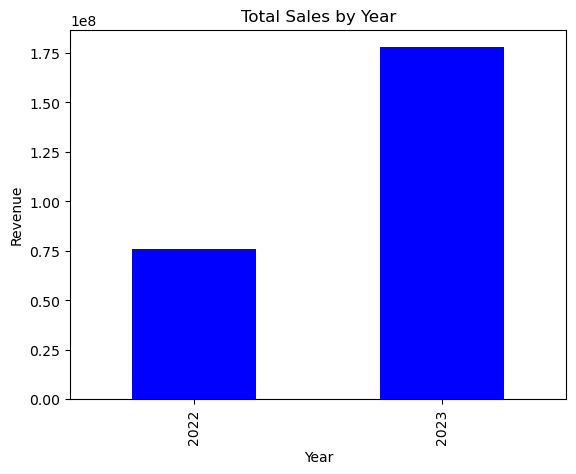

In [69]:
sales_by_year = sk_elec.groupby('Year')['Total_Amount'].sum()
sales_by_year.plot(kind='bar', title="Total Sales by Year", color='blue')
plt.ylabel("Revenue")
plt.show()

In [73]:
# 2. Which products generate the most revenue?
top_products = sk_elec.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False).head(5)
top_products

Product
Laptop    65305277
Camera    56779441
TV        44544852
Mobile    31190479
Tablet    27280066
Name: Total_Amount, dtype: int64

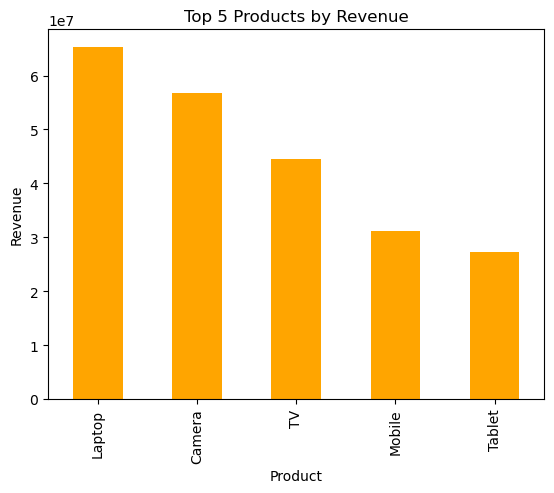

In [74]:
top_products = sk_elec.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', color='orange', title="Top 5 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

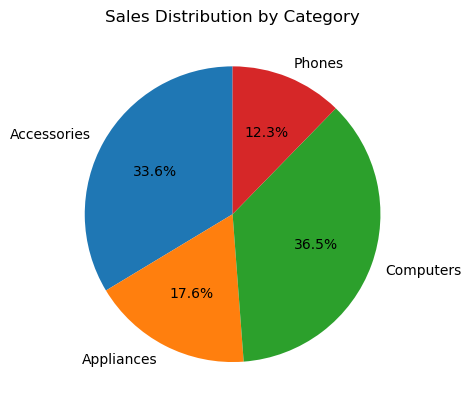

In [21]:
# 3. Which product categories contribute most to sales?
sk_elec.groupby('Category')['Total_Amount'].sum().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, title="Sales Distribution by Category")
plt.ylabel("")
plt.show()


In [22]:
# Customer Analysis 

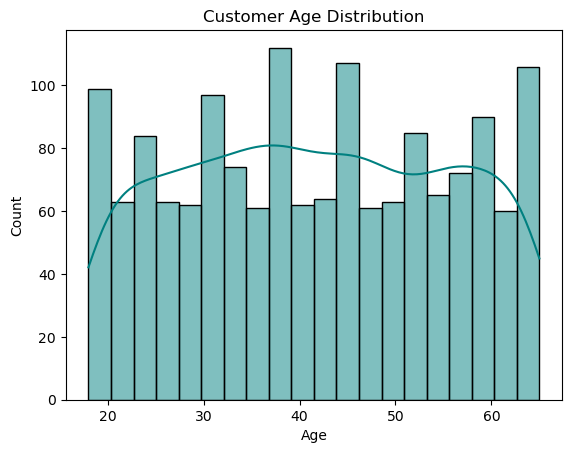

In [23]:
# Age Distribution
# 4. What is the age profile of customers?
sns.histplot(sk_elec['Customer_Age'], bins=20, kde=True, color='teal')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


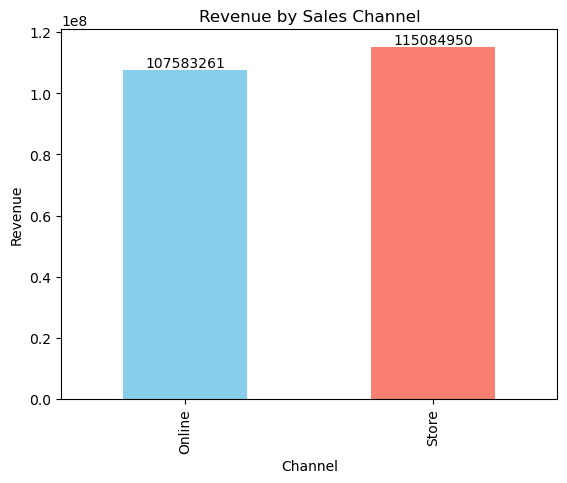

In [77]:
# 5.Which channel—online or store—performs better?
cn = sk_elec.groupby('Channel')['Final_Amount'].sum().plot(
    kind='bar', color=['skyblue','salmon'], title="Revenue by Sales Channel")
plt.ylabel("Revenue")
for container in ax.containers:
    cn.bar_label(container, fmt='%.0f')  
plt.show()



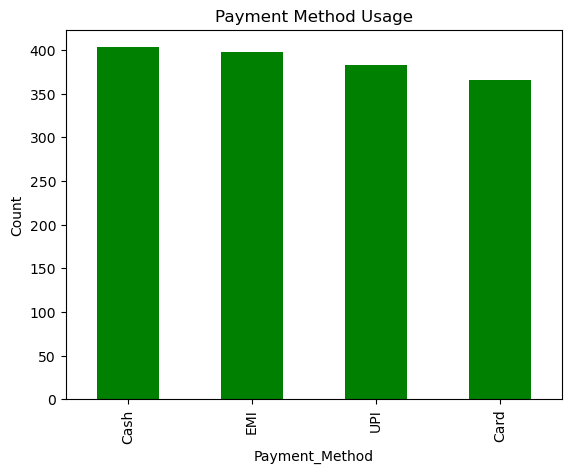

In [26]:
# 6. What are customers’ preferred payment methods?
sk_elec['Payment_Method'].value_counts().plot(kind='bar', color='green', title="Payment Method Usage")
plt.ylabel("Count")
plt.show()

In [27]:
# Brand & Satisfaction

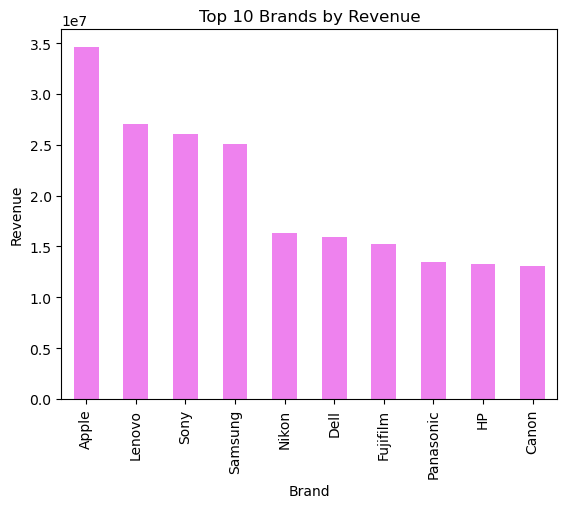

In [28]:
# 7. Which brands are most profitable?
brand_revenue =sk_elec.groupby('Brand')['Total_Amount'].sum().sort_values(ascending=False).head(10)
brand_revenue.plot(kind='bar', color='violet', title="Top 10 Brands by Revenue")
plt.ylabel("Revenue")
plt.show()

Sales by Region:
 Region
Urban         64983042.60
Semi-Urban    55462341.09
Rural         54507805.17
None          47715021.93
Name: Final_Amount, dtype: float64


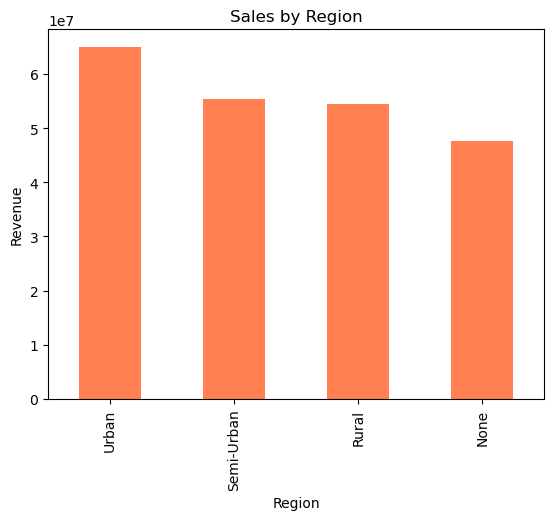

In [29]:
# Best Performing Regions
# 8.Which regions contribute most to revenue?
region_sales = sk_elec.groupby('Region')['Final_Amount'].sum().sort_values(ascending=False)
print("Sales by Region:\n", region_sales)
region_sales.plot(kind='bar', color='coral', title="Sales by Region")
plt.ylabel("Revenue")
plt.show()


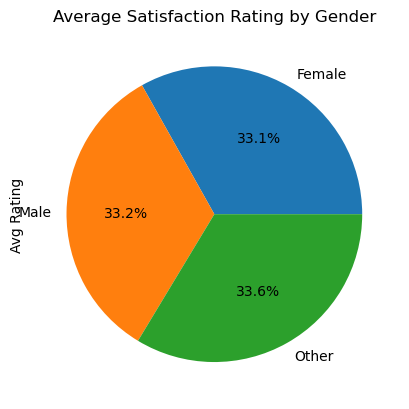

In [33]:
# Customer_Satisfaction_Rating
# 9. How does customer satisfaction rating by gender?
gender_rating= sk_elec.groupby('Customer_Gender')['Customer_Satisfaction_Rating'].mean()
gender_rating.plot(kind='pie', color='brown', title="Average Satisfaction Rating by Gender", autopct='%1.1f%%')
plt.ylabel("Avg Rating")
plt.show()

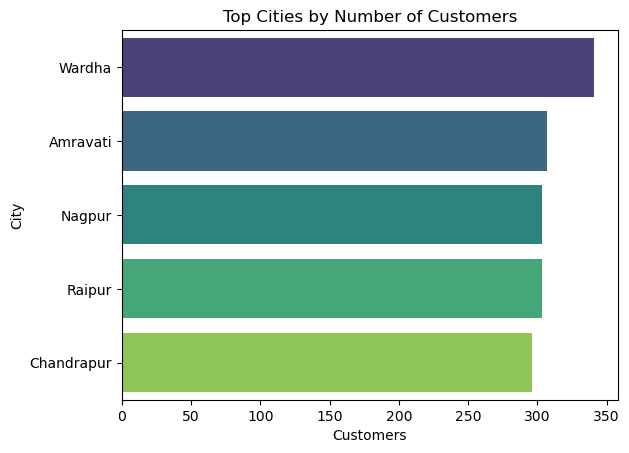

In [67]:
# 10. From which location have most customers come?
city_customers = sk_elec['Customer_City'].value_counts().head(5).reset_index()
city_customers.columns = ['Customer_City', 'Count']
sns.barplot( data=city_customers,  x='Count', y='Customer_City', hue='Customer_City', palette='viridis', dodge=False,
    legend=False)
plt.title("Top Cities by Number of Customers")
plt.xlabel("Customers")
plt.ylabel("City")
plt.show()

Quarterly Sales:
   Quarter  Final_Amount
0  2022Q1   17420924.56
1  2022Q2   17039923.05
2  2022Q3   19705891.98
3  2022Q4   12626715.72
4  2023Q1   35178325.12
5  2023Q2   38794788.56
6  2023Q3   43380721.70
7  2023Q4   38520920.10


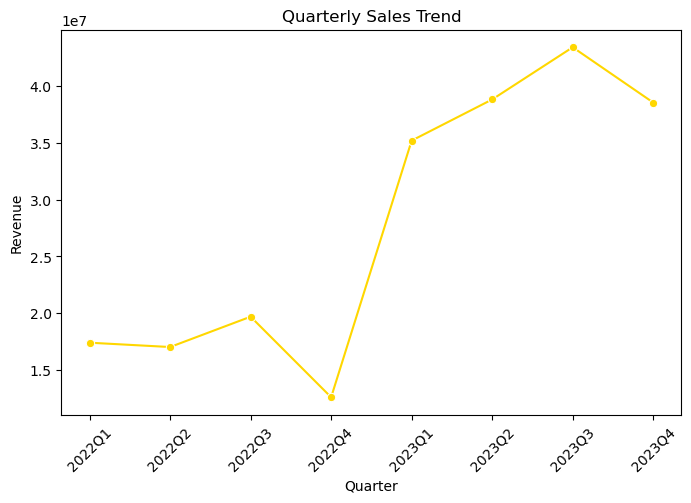

In [35]:
 # Seasonality (Quarterly Sales)
# 11.In which quarter were the sales the highest?
sk_elec['Quarter'] = sk_elec['Date'].dt.to_period('Q').astype(str)
quarterly_sales = sk_elec.groupby('Quarter')['Final_Amount'].sum().reset_index()
print("Quarterly Sales:\n", quarterly_sales)
plt.figure(figsize=(8,5))
sns.lineplot(x="Quarter", y="Final_Amount", data=quarterly_sales, marker="o", color="gold")
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


C:\Users\ashuv\AppData\Local\Temp\ipykernel_16220\3364472796.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sk_elec.groupby('Discount_Range')['Final_Amount'].sum().plot(


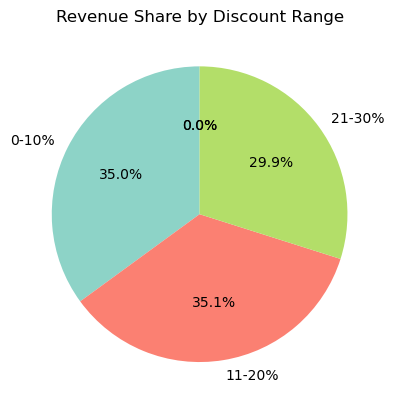

In [45]:
# 12. How do discounts affect revenue?
sk_elec['Discount (%)'] = pd.to_numeric(sk_elec['Discount (%)'], errors='coerce')
sk_elec['Discount_Range'] = pd.cut(sk_elec['Discount (%)'], 
                                   bins=[0,10,20,30,40,50], 
                                   labels=['0-10%','11-20%','21-30%','31-40%','41-50%'])
sk_elec.groupby('Discount_Range')['Final_Amount'].sum().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap="Set3", ylabel="")
plt.title("Revenue Share by Discount Range")
plt.show()


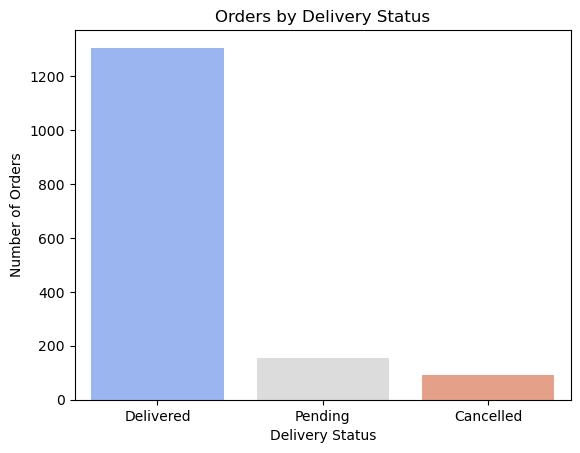

In [59]:
# Count by Delivery Status
delivery_count = sk_elec['Delivery_Status'].value_counts().reset_index()
delivery_count.columns = ['Delivery_Status', 'Count']
sns.barplot(data=delivery_count, x="Delivery_Status", y="Count", hue="Delivery_Status", 
            palette="coolwarm", legend=False)
plt.title("Orders by Delivery Status")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.show()


 ### THANK YOU 